# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data Preparation

In [4]:
def clean_colnames(df: pd.DataFrame) -> pd.DataFrame:
  df = df.copy()
  df.columns = df.columns.str.lower().str.replace(' ', '_')
  return df

In [5]:
def standardize_text_cols(df: pd.DataFrame) -> pd.DataFrame:
  df = df.copy()
  string_columns = list(df.dtypes[df.dtypes == 'object'].index)

  for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
  
  return df

In [6]:
df = clean_colnames(df)
df = standardize_text_cols(df)

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [8]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


[Text(0.5, 1.0, 'Distribution of Car Prices')]

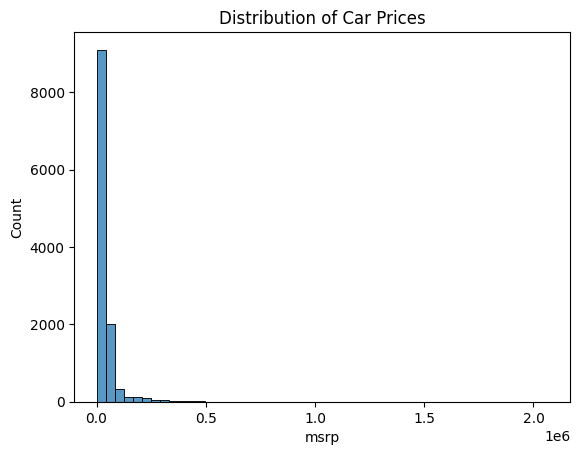

In [9]:
sns.histplot(df.msrp, bins=50).set(title='Distribution of Car Prices')

[Text(0.5, 1.0, 'Distribution of Car Prices')]

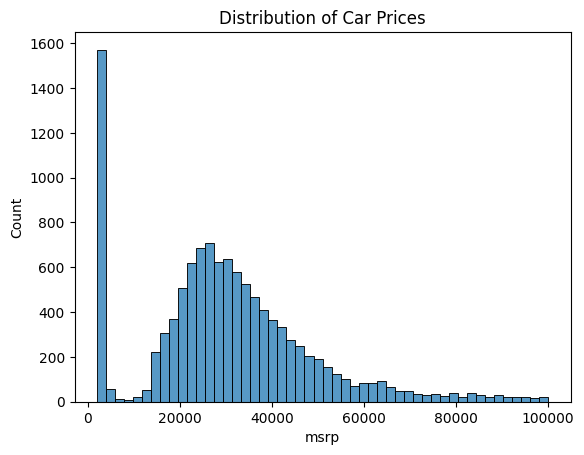

In [10]:
sns.histplot(df[df.msrp < 100000].msrp, bins=50).set(title='Distribution of Car Prices')

## Model Input Preparation

In [11]:
def split_dataset(df: pd.DataFrame, cv_ratio, test_ratio) -> pd.DataFrame:
  n = df.shape[0]

  n_val = int(cv_ratio * n)
  n_test = int(test_ratio * n)
  n_train = n - (n_val + n_test)

  idx = list(df.index)

  np.random.seed(123)
  np.random.shuffle(idx)

  df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
  df_val = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
  df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

  return df_train, df_val, df_test

In [12]:
def log_transform(df: pd.DataFrame) -> pd.DataFrame:
  df = df.copy()
  price_logs = np.log1p(df.msrp)
  df['msrp_log'] = price_logs

  df.drop('msrp', axis=1, inplace=True)

  return df

In [13]:
df_train, df_val, df_test = split_dataset(df, .2, .2)
df_train = log_transform(df_train)
df_val = log_transform(df_val)
df_test = log_transform(df_test)

In [14]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp_log
0,plymouth,colt,1994,regular_unleaded,113.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,30,23,535,7.601402
1,rolls-royce,phantom_coupe,2014,premium_unleaded_(required),453.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,performance",large,coupe,19,11,86,12.979765
2,toyota,tacoma,2017,regular_unleaded,278.0,6.0,automatic,four_wheel_drive,4.0,NaN,compact,crew_cab_pickup,23,18,2031,10.472091
3,honda,pilot,2016,regular_unleaded,280.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,27,19,2202,10.313808
4,infiniti,q50,2016,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,29,19,190,10.594157


## Linear Regression

In [15]:
def dot_product(v1: list, v2: list) -> float:
  result = 0.0

  n = len(v1)

  for i in range(n):
    result += v1[i] * v2[i]

  return result

In [16]:
def linear_regression(X: np.array, w: list, b: float) -> float:
  w_new = [b] + w

  return X.dot(w_new)

In [17]:
b = 7.17
w = [.01, .04, .002]

In [18]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = np.array([x1, x2, x3])

In [19]:
linear_regression(X, w, b)

array([12.38 , 13.552, 12.312])

In [20]:
X = [[148, 24, 1385],
     [132, 25, 2031],
     [453, 11, 86],
     [158, 24, 185],
     [172, 25, 201],
     [413, 11, 86],
     [38, 54, 185],
     [142, 25, 431],
     [453, 31, 86]]

X = np.array(X)

In [21]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [22]:
def train_linear_regression(X: np.array, y: np.array, r: float =.01) -> float:
  # add column for the bias
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  # compute optimal weights
  XTX = X.T.dot(X)
  XTX += r * np.eye(XTX.shape[0]) # regularization
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)
  
  return w[0], w[1:]

## Baseline Model

In [23]:
def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
  df = df.copy()
  return df.fillna(0)

In [24]:
def feature_prep(df: pd.DataFrame, input_cols: list) -> np.array:
  df = df.copy()
  input_cols = input_cols.copy()

  df['age'] = 2017 - df.year
  input_cols += ['age']

  df.number_of_doors = df.number_of_doors.fillna(0).astype('int')
  for v in [2, 3, 4]:
    df[f'num_doors_{v}'] = (df.number_of_doors == v).astype(int)
    input_cols += [f'num_doors_{v}']

  df = fill_missing_values(df)
  X = df[input_cols].values

  return X

In [25]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', ]

In [26]:
X_train = feature_prep(df_train, base)
X_val = feature_prep(df_val, base)
X_test = feature_prep(df_test, base)

In [27]:
y_train = df_train['msrp_log']
y_val = df_val['msrp_log']
y_test = df_test['msrp_log']

In [28]:
w0, w = train_linear_regression(X_train, y_train)

In [29]:
def predict_log(X: np.array, b: np.array, w: np.array) -> float:
  return b + X.dot(w)

In [30]:
pred_val = predict_log(X_val, w0, w)

<Axes: xlabel='msrp_log', ylabel='Count'>

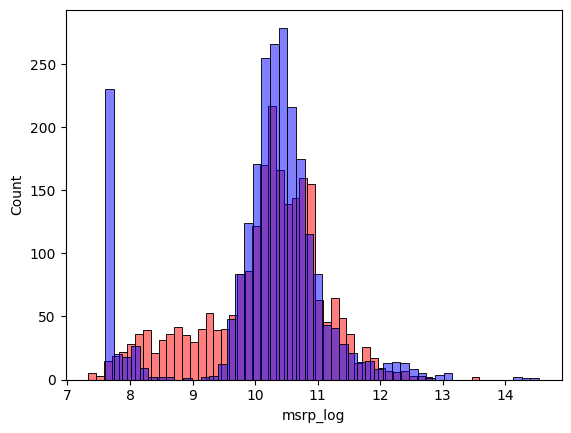

In [31]:
sns.histplot(pred_val, color='red', alpha=.5, bins=50)
sns.histplot(y_val, color='blue', alpha=.5, bins=50)

## Error Function

In [32]:
def pred_rmse(y_true: np.array, y_pred: np.array) -> float:
  error = y_true - y_pred
  squared_error = np.square(error)
  mse = squared_error.mean()
  rmse = np.sqrt(mse)

  return rmse

In [33]:
pred_rmse(y_val, pred_val)

0.5050515869414013

## Parameter Tuning

In [34]:
for r in [.1, .01, .001, .0001, .00001, 0]:
  w0, w = train_linear_regression(X_train, y_train, r)
  pred_val = predict_log(X_val, w0, w)
  err = pred_rmse(y_val, pred_val)
  print(f'{r}: {err}')

0.1: 0.5064922104482924
0.01: 0.5050515869414013
0.001: 0.5049617595978195
0.0001: 0.5049540029679221
1e-05: 0.5049532407161231
0: 0.5049531561730896


## Model Testing

In [35]:
df_train_full = pd.concat([df_train, df_val])

In [36]:
X_train_full = feature_prep(df_train_full, base)
y_train_full = df_train_full['msrp_log']
w0, w = train_linear_regression(X_train, y_train, r=0)
pred_test = predict_log(X_test, w0, w)
pred_rmse(y_test, pred_test)

0.5049184133949597

<Axes: xlabel='msrp_log', ylabel='Count'>

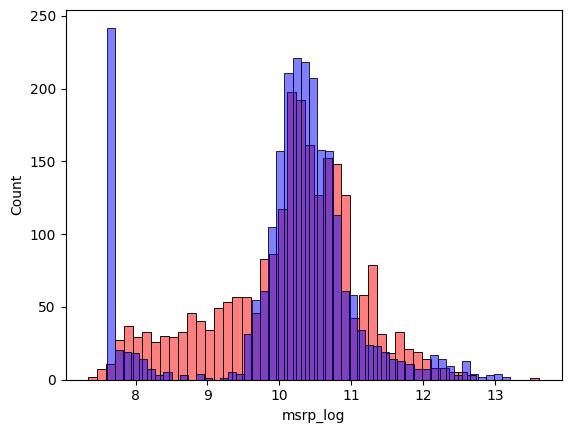

In [37]:
sns.histplot(pred_test, color='red', alpha=.5, bins=50)
sns.histplot(y_test, color='blue', alpha=.5, bins=50)

## Prediction

In [38]:
new_data = df_test.iloc[4].to_dict()

In [39]:
df_new = pd.DataFrame([new_data])
X_new = feature_prep(df_new, base)
pred = predict_log(X_new, w0, w)
pred_price = np.expm1(pred)[0]

In [40]:
pred_price

22500.02964834728

In [41]:
np.expm1(df_new['msrp_log'])

0    24200.0
Name: msrp_log, dtype: float64